In [1]:
%load_ext autoreload
%autoreload 2

#Import des packages pre-conçus
import numpy as np
import pandas as pd
import os
import cv2
from PIL import Image
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import segmentation_models as sm
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score
# from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable


2023-12-11 12:10:01.931864: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-11 12:10:02.215706: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-11 12:10:02.233017: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/valerio/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/cv2/../../lib64:


Segmentation Models: using `keras` framework.


In [2]:
PACKAGE_PATH = os.path.dirname(os.getcwd())
LOCAL_REGISTRY_PATH = os.path.join(PACKAGE_PATH, 'raw_data')

In [3]:
#import des packages créés

#import sys
#sys.path.append('/Users/kany/code/TigerManon/drive-on-mars/drive_on_mars/model')

from drive_on_mars.model.model import initialize_model, compile_model, train_model
from drive_on_mars.model.registry import save_model, save_results, load_model
from drive_on_mars.model.data import create_df, preproc_image, load_mask, preproc, load_preproc, decompose_label, load_images


In [151]:
# Prediction : load le model

model = load_model()



Load latest model from local registry...

Load latest model from disk...
✅ Model compiled
✅ Model loaded from local disk


In [152]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [153]:
# Preprocess d'une seule image
img_test = '/home/valerio/code/ValerioCann/ai4mars-dataset-merged-0.1/NLA_401751359EDR_F0042100NCAM00307M1.JPG'
X_pred_processed = preproc_image(img_test)
X_pred_processed = np.array([X_pred_processed])
X_pred_processed.shape


(1, 256, 256, 3)

In [154]:
# Créer la prediction
y_pred = model.predict(X_pred_processed)
print(f"✅ pred() done")
y_pred.shape


1/1 [==============================] - 1s 548ms/step
✅ pred() done


(1, 256, 256, 5)

In [155]:
y_pred

array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
          0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
          0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
          0.0000000e+00],
         ...,
         [4.7566541e-13, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
          0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
          0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
          0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
          0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
          0.0000000e+00],
         [9.8577877e-14, 0.0000000e+00, 0.0000000e+00, 9.9999994e-01,
          0.0000000e+00],
         ...,
         [9.9999994e-01, 0.0000000e+00, 0.0000000e+00, 2.9985747e-22,
          0.0000000e+00],
         [

In [156]:
label_test = '/home/valerio/code/ValerioCann/ai4mars-dataset-merged-0.1/NLA_401751359EDR_F0042100NCAM00307M1.JPG'

In [157]:
layer_0 = y_pred[0][:,:,0]
layer_1= y_pred[0][:,:,1]
layer_2 = y_pred[0][:,:,2]
layer_3 = y_pred[0][:,:,3]
layer_4 = y_pred[0][:,:,4]

image = cv2.imread(img_test)

custom_colors = {
    0: 'blue',
    1: 'yellow',
    2: 'purple',
    3: 'red',
    4: 'white',
}

labels_key = {
    0: 'soil',
    1: 'bedrock',
    2: 'sand',
    3: 'big rock',
    4: '(no label)',
}

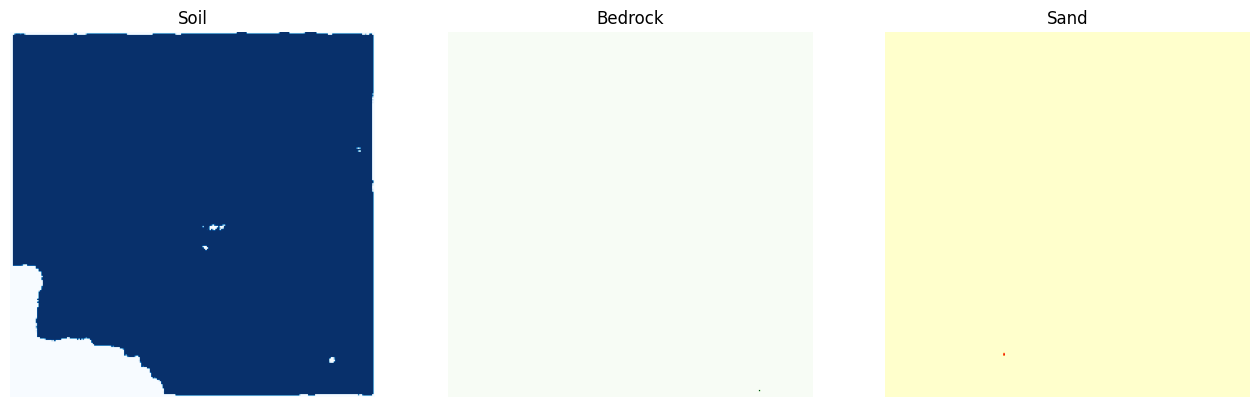

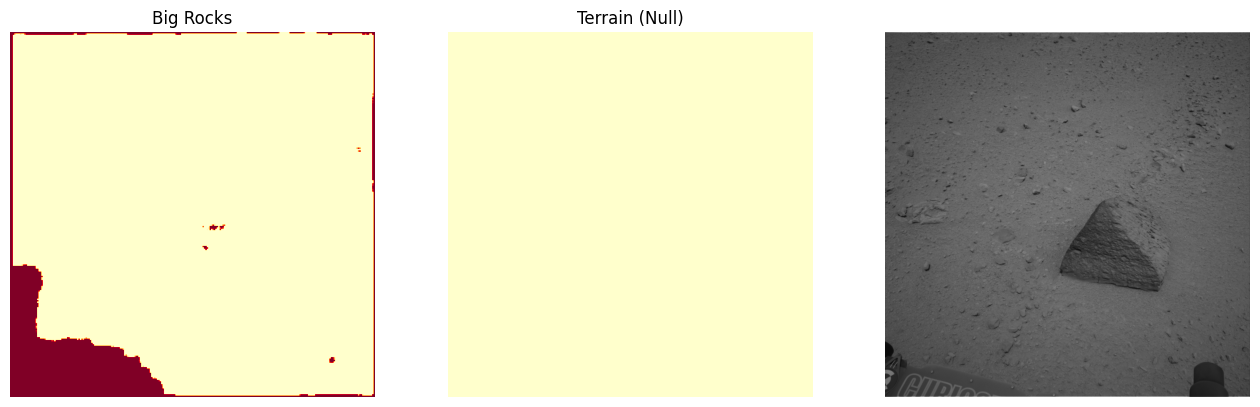

In [158]:
fig, ax = plt.subplots(1, 3, figsize=(16,9))
ax[0].axis('off')
ax[0].imshow(layer_0, cmap='Blues')
ax[0].set_title('Soil')
ax[1].axis('off')
ax[1].imshow(layer_1, cmap='Greens')
ax[1].set_title('Bedrock')
ax[2].axis('off')
ax[2].imshow(layer_2, cmap='YlOrRd')
ax[2].set_title('Sand')

fig, ax = plt.subplots(1, 3, figsize=(16,9))
ax[0].axis('off')
ax[0].imshow(layer_3, cmap='YlOrRd')
ax[0].set_title('Big Rocks')
ax[1].axis('off')
ax[1].imshow(layer_4,cmap='YlOrRd')
ax[1].set_title('Terrain (Null)')

ax[2].axis('off')
ax[2].imshow(image,cmap='gray')

# ax[2].imshow(la, alpha =0.6, cmap='YlOrRd')
# ax[2].set_title('All')


In [159]:
print(model)

In [160]:
premiere_couche = np.ma.masked_where(layer_0 == 0, layer_0)
deuxieme_couche = np.ma.masked_where(layer_1 == 0, layer_1)
troisieme_couche = np.ma.masked_where(layer_2 == 0, layer_2)
quantirieme_couche = np.ma.masked_where(layer_3 == 0, layer_3)
cinquieme_couche = np.ma.masked_where(layer_4 == 0, layer_4)

In [161]:
nouv_prem_couche = cv2.resize(premiere_couche, (1024, 1024), interpolation=cv2.INTER_LINEAR)
nouv_deux_couche = cv2.resize(deuxieme_couche, (1024, 1024), interpolation=cv2.INTER_LINEAR)
nouv_trois_couche = cv2.resize(troisieme_couche, (1024, 1024), interpolation=cv2.INTER_LINEAR)
nouv_quatr_couche = cv2.resize(quantirieme_couche, (1024, 1024), interpolation=cv2.INTER_LINEAR)
nouv_cinq_couche = cv2.resize(cinquieme_couche, (1024, 1024), interpolation=cv2.INTER_LINEAR)

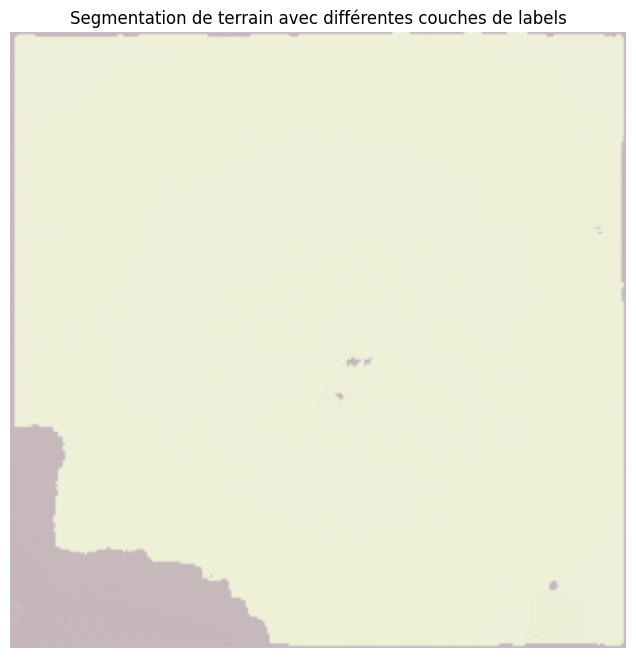

In [163]:

# Création du plot avec les couches de labels superposées à l'image originale
plt.figure(figsize=(10, 8))

# Affichage de l'image d'origine
plt.imshow(image)

# Superposition des couches de labels avec différentes couleurs et transparences
alpha = 0.5  # Niveau de transparence pour les couches de labels

plt.imshow(nouv_prem_couche, cmap='Blues', alpha=alpha)
plt.imshow(nouv_deux_couche, cmap='Reds', alpha=alpha)
plt.imshow(nouv_trois_couche, cmap='Greens', alpha=alpha)
plt.imshow(nouv_quatr_couche, cmap='Purples', alpha=alpha)
plt.imshow(nouv_cinq_couche, cmap='YlOrRd', alpha=alpha)

# Configuration des axes et du titre
plt.axis('off')  # Désactivation des axes
plt.title('Segmentation de terrain avec différentes couches de labels')

# Affichage
plt.show()

TypeError: Invalid shape (5, 256, 256) for image data

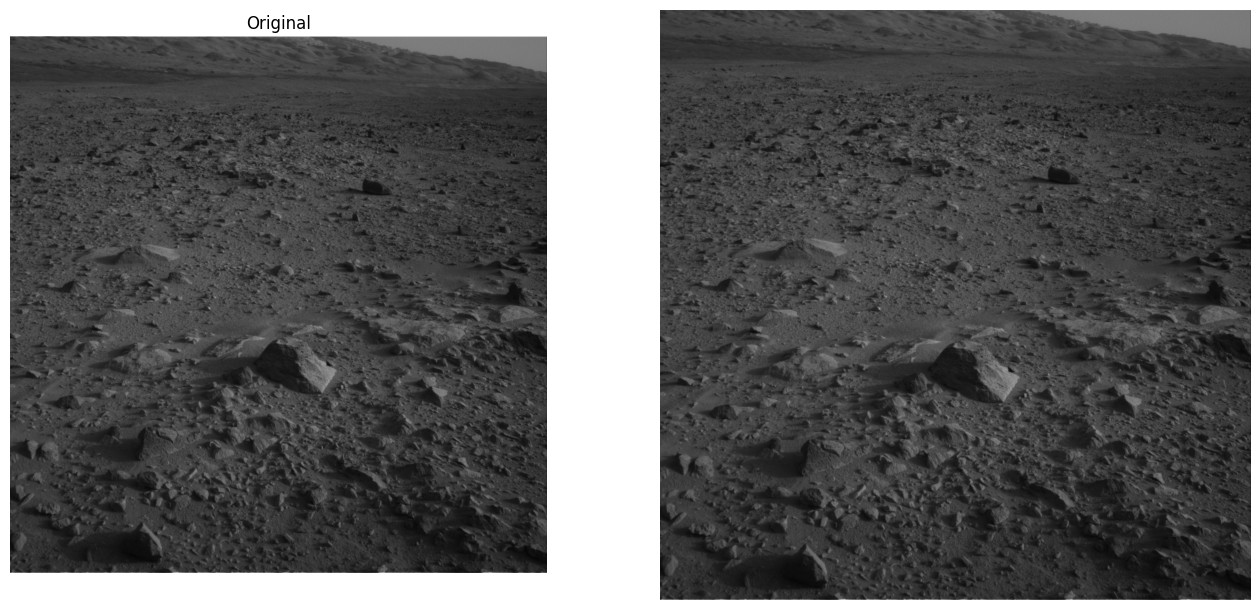

In [51]:
def show_labels_comp(image,label):
    fig, ax = plt.subplots(1, 2, figsize=(16, 9), gridspec_kw={'width_ratios': [2, 2.2]})

    ax[0].axis('off')
    ax[0].imshow(image, cmap='gray', aspect='equal')  # Set aspect='equal' for square
    ax[0].set_title('Original')

    ax[1].axis('off')
    ax[1].imshow(image, cmap='gray', aspect='equal')  # Set aspect='equal' for square
    img = ax[1].imshow(label, alpha=0.3, cmap=cmap_labels, aspect='equal')  # Set aspect='equal' for square
    ax[1].set_title('Labels')

#     divider = make_axes_locatable(ax[1])
#     cbar_ax = divider.append_axes("right", size="5%", pad=0.2)  # Adjust the size and pad

#     # Add colorbar to the right subplot
#     cbar = fig.colorbar(img, cax=cbar_ax, ticks=np.unique(label), orientation='vertical')

#     # Add tick labels to the colorbar
#     tick_labels = labels_key.values()
#     cbar.set_ticks(np.unique(label))
#     cbar.set_ticklabels(tick_labels)
#     cbar.ax.tick_params(axis='y', length=0)
#     cbar.ax.set_yticklabels(tick_labels, va='center')


    plt.show()
show_labels_comp(image,labels)